In [1]:
# notebook for feature engineering

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *
from visualize import *

In [2]:
data = pd.read_csv('data_s.csv', header=0).set_index('frame')
data

,snout_x,snout_y,l_ear_x,l_ear_y,r_ear_x,r_ear_y,spine1_x,spine1_y,spine2_x,spine2_y,...,ll_corner_x,ll_corner_y,lr_corner_x,lr_corner_y,l_screen_x,l_screen_y,m_screen_x,m_screen_y,r_screen_x,r_screen_y
frame,,,,,,,,,,,,,,,,,,,,,
0,14.490065,11.175044,14.207173,13.795341,12.494864,12.858491,12.362958,14.381109,10.123232,14.859498,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798
1,14.495053,11.174815,14.513725,13.781233,12.649496,12.614034,12.552516,14.338730,10.337374,14.827950,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798
2,14.538345,11.172822,14.621904,13.776254,12.794867,12.607344,12.546165,14.200734,10.398344,14.824187,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798
3,14.767279,11.163456,14.622779,13.795248,12.811738,12.606568,12.553062,14.200416,10.418239,14.823272,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798
4,14.783768,11.411999,14.648827,13.893366,12.993064,12.678718,12.553062,14.200416,10.418283,14.824227,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50998,5.191507,12.206660,6.286801,14.268539,4.474457,14.206750,5.298068,15.671462,3.267637,16.448483,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798
50999,5.193924,12.210643,6.288286,14.268471,4.521786,14.178094,5.307393,15.874079,3.282380,16.453441,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798
51000,5.196093,12.220804,6.288286,14.268471,4.558447,14.176407,5.307043,15.889567,3.282941,16.465643,...,0.0,0.0,26.8,4.598738e-17,5.530251,19.291952,13.930584,19.336686,22.106398,18.988798


In [3]:
# orientation
# defined as the line between snout-tail base & the horizontal (x) axis
sx = data['snout_x']
sy = data['snout_y']
tx = data['tail1_x']
ty = data['tail1_y']

dx = sx - tx
dy = sy - ty 
ang = np.arctan2(dy, dx)
ang += (ang < 0).astype(int) * 2 * pi + ang  # cast to [0, 2 pi] range

data['orientation'] = ang
data['forward'] = np.logical_and(data['orientation'] > 0, data['orientation'] < pi).astype(int)

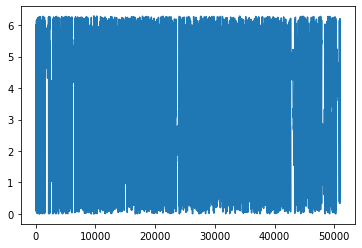

In [4]:
sns.lineplot(x=range(len(ang)), y=ang);

In [6]:
# distance to keypoints

def distance(df, name1: str, name2: str):
    """Appends Euclidean distance between point1 & point2 to the DataFrame, in-place"""
    dx = df[name1+'_x'] - df[name2+'_x']
    dy = df[name1+'_y'] - df[name2+'_y']
    df[name1+'_'+name2] = np.sqrt(dx**2+dy**2)

In [7]:
distance(data, 'snout', 'food_port')
distance(data, 'snout', 'l_screen')
distance(data, 'snout', 'm_screen')
distance(data, 'snout', 'r_screen')

<AxesSubplot:xlabel='frame', ylabel='snout_food_port'>

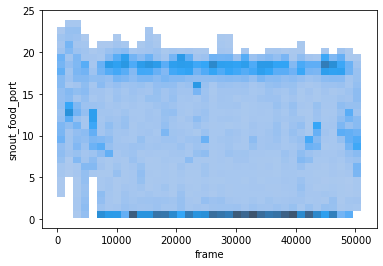

In [8]:
sns.histplot(data, x='frame', y='snout_food_port')

In [9]:
def velocity1(df, col: str, name: str = 'v_'):
    """Velocity of scalar values (distance)"""
    df[name+col] = np.diff(df[col], prepend=df[col][0])

def velocity2(df, col: str, name: str = 'v_'):
    """Velocity of vector values (coordinates)"""
    dx = np.diff(df[col+'_x'], prepend=df[col+'_x'][0])
    dy = np.diff(df[col+'_x'], prepend=df[col+'_x'][0])
    df[name+col] = np.sqrt(dx**2+dy**2)

In [10]:
velocity2(data, 'snout')
velocity2(data, 'spine1')
velocity2(data, 'spine2')
velocity2(data, 'tail1')
velocity1(data, 'snout_food_port')
velocity1(data, 'snout_l_screen')
velocity1(data, 'snout_m_screen')
velocity1(data, 'snout_r_screen')

<AxesSubplot:xlabel='v_snout', ylabel='Count'>

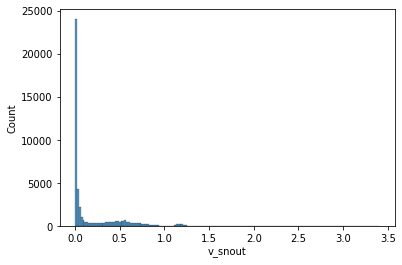

In [15]:
sns.histplot(data['v_snout'])

In [11]:
# angular velocity
velocity1(data, 'orientation')

In [12]:
# acceleration
[velocity1(data, col, name='dv_') for col in data.columns if col[:2] == 'v_'];

In [13]:
data.iloc[:, 28:]

,orientation,forward,snout_food_port,snout_l_screen,snout_m_screen,snout_r_screen,v_snout,v_spine1,v_spine2,v_tail1,...,v_orientation,dv_v_snout,dv_v_spine1,dv_v_spine2,dv_v_tail1,dv_v_snout_food_port,dv_v_snout_l_screen,dv_v_snout_m_screen,dv_v_snout_r_screen,dv_v_orientation
frame,,,,,,,,,,,,,,,,,,,,,
0,5.044273,0,10.446977,12.089767,8.180796,10.911612,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.033164,0,10.447312,12.093617,8.181367,10.908296,0.007053,0.268076,0.302842,0.112997,...,-0.011109,0.007053,0.268076,0.302842,0.112997,0.000334,0.003851,0.000572,-0.003316,-0.011109
2,5.019396,0,10.450312,12.127078,8.186455,10.879563,0.061225,0.008982,0.086224,0.190054,...,-0.013768,0.054173,-0.259095,-0.216619,0.077057,0.002667,0.029610,0.004516,-0.025416,-0.002659
3,5.061251,0,10.470308,12.304273,8.215945,10.728404,0.323760,0.009754,0.028137,0.002158,...,0.041855,0.262535,0.000772,-0.058087,-0.187896,0.016995,0.143733,0.024402,-0.122427,0.055623
4,5.129939,0,10.718751,12.154063,7.970483,10.537020,0.023320,0.000000,0.000062,0.104744,...,0.068688,-0.300440,-0.009754,-0.028075,0.102585,0.228447,-0.327404,-0.274953,-0.040225,0.026832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50998,4.784718,0,14.008106,7.093385,11.278685,18.223911,0.005017,0.000000,0.001651,0.000000,...,0.004037,0.004489,-0.029695,0.001198,0.000000,-0.001179,-0.000962,-0.002969,-0.003245,0.001251
50999,4.786777,0,14.009950,7.089292,11.274296,18.220186,0.003417,0.013188,0.020850,0.000000,...,0.002059,-0.001600,0.013188,0.019199,0.000000,-0.003370,0.004995,0.004004,0.002892,-0.001978
51000,4.790809,0,14.016975,7.079039,11.266194,18.214395,0.003067,0.000496,0.000794,0.000000,...,0.004032,-0.000350,-0.012692,-0.020055,0.000000,0.005181,-0.006160,-0.003712,-0.002067,0.001973


In [14]:
data.to_csv('data_e.csv')